In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
full_data = pd.read_csv("churn.csv")
full_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
full_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='Churn', ylabel='count'>

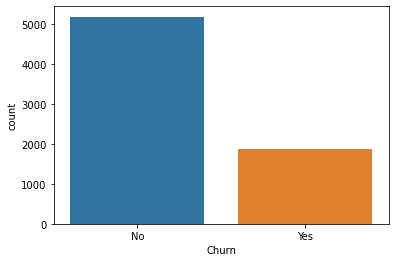

In [4]:
sns.countplot(full_data['Churn'])

<AxesSubplot:xlabel='gender', ylabel='count'>

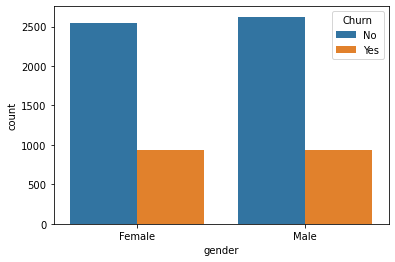

In [5]:
sns.countplot(x ='gender', hue='Churn', data=full_data)

# Data Cleaning


In [6]:
full_data = full_data.drop('customerID', axis=1)
for i in full_data.columns:
  if full_data[i].dtype == np.number:
    continue
  full_data[i] = LabelEncoder().fit_transform(full_data[i])


In [7]:
all_col=[]
for i in full_data.columns: 
   all_col.append(i) 


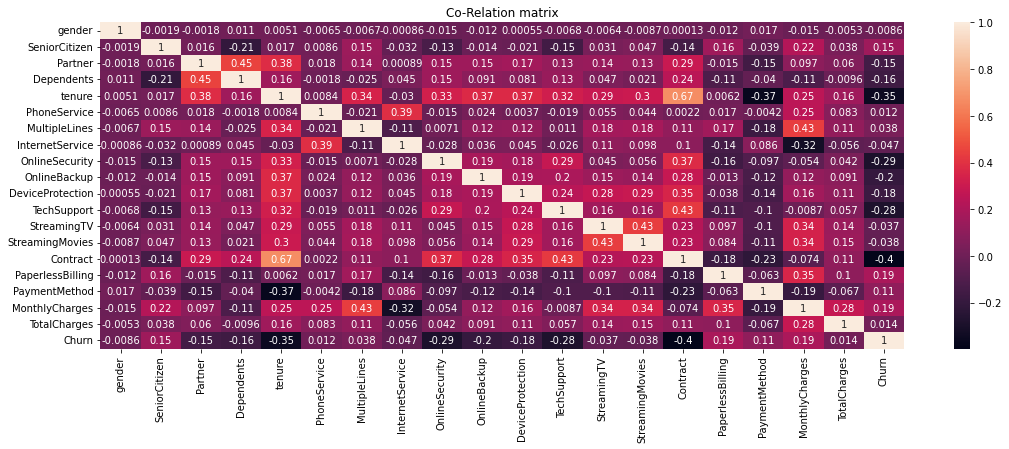

<Figure size 1296x576 with 0 Axes>

In [8]:
plt.figure(figsize=(18, 6))
co_relation_matrix = full_data.corr()
plt.title("Co-Relation matrix")
sns.heatmap(co_relation_matrix,annot=True) 
plt.figure(figsize=(18,8))
plt.show()


In [9]:
full_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [10]:
from scipy.stats import ttest_1samp
full_data_mean = np.mean(full_data)
full_data_mean

gender                 0.504756
SeniorCitizen          0.162147
Partner                0.483033
Dependents             0.299588
tenure                32.371149
PhoneService           0.903166
MultipleLines          0.940508
InternetService        0.872923
OnlineSecurity         0.790004
OnlineBackup           0.906432
DeviceProtection       0.904444
TechSupport            0.797104
StreamingTV            0.985376
StreamingMovies        0.992475
Contract               0.690473
PaperlessBilling       0.592219
PaymentMethod          1.574329
MonthlyCharges        64.761692
TotalCharges        3257.794122
Churn                  0.265370
dtype: float64

In [11]:
tset, pval = ttest_1samp(full_data_mean,full_data_mean.mean())
print(tset)
print('p-values',pval)
if pval < 0.05: #alpha 0.05
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0.0
p-values 1.0
we are accepting null hypothesis


In [12]:
# Scaling the data
x = full_data.drop('Churn', axis=1)
y = full_data['Churn']
x = StandardScaler().fit_transform(x)

In [13]:
x

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# LogisticRegression

In [15]:
model_log = LogisticRegression()


In [16]:
# Train the model
model_log.fit(xtrain, ytrain)

LogisticRegression()

In [17]:
predictions1 = model_log.predict(xtest)
predictions1

array([1, 0, 0, ..., 0, 0, 0])

In [18]:
print(classification_report(ytest, predictions1))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [19]:
f, t, _ = metrics.roc_curve(ytest,  predictions1)


In [20]:
auc = metrics.roc_auc_score(ytest, predictions1)


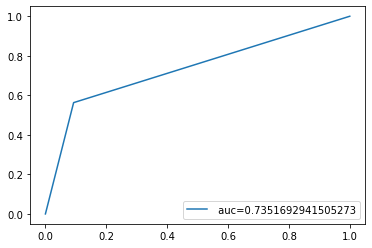

In [21]:
plt.plot(f,t,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:

confusion_mtx = confusion_matrix(ytest,predictions1)


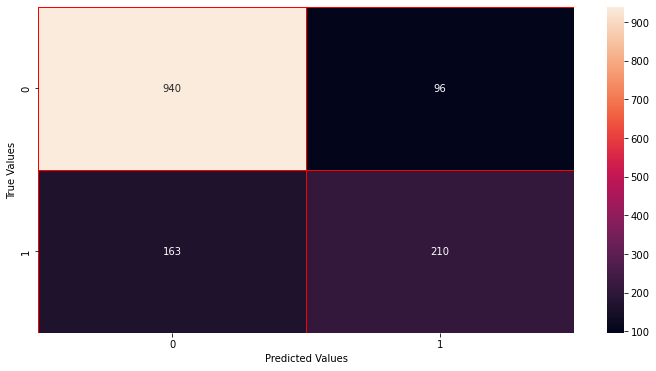

In [23]:

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# hyperparameter tuning

In [24]:
model_log2 = LogisticRegression(penalty='l1',class_weight=dict,solver='saga')


In [25]:
# Train the model
model_log2.fit(xtrain, ytrain)
predictions = model_log2.predict(xtest)

# print the predictions
print(predictions)
print(classification_report(ytest, predictions))

[1 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [26]:
predictions = model_log.predict(xtest)
confusion_mtx = confusion_matrix(ytest,predictions)


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



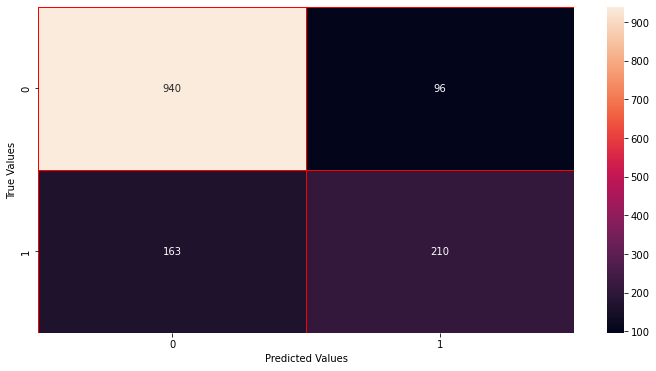

In [27]:
print(classification_report(ytest, predictions))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Naive bayes
# GaussianNB

In [28]:
nv = naive_bayes.GaussianNB()
nv.fit(xtrain,ytrain)
y_pred = nv.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



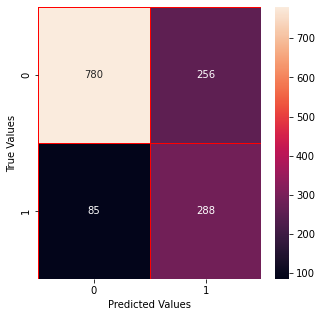

In [29]:
confusion_mtx = confusion_matrix(ytest,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# BernoulliNB()

In [30]:
nv1 = naive_bayes.BernoulliNB()
nv1.fit(xtrain,ytrain)
y_pred = nv1.predict(xtest)
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1036
           1       0.53      0.75      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409



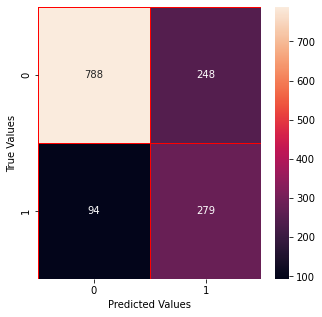

In [31]:
confusion_mtx = confusion_matrix(ytest,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [32]:
f, t, _ = metrics.roc_curve(ytest,y_pred)


In [33]:
auc = metrics.roc_auc_score(ytest,y_pred)


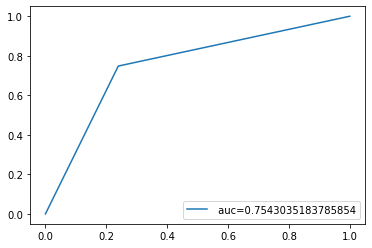

In [34]:
plt.plot(f,t,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [36]:
# xtrain, xtest, ytrain, ytest
KNN=KNeighborsClassifier()
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [37]:
y_pred_knn = KNN.predict(xtest)
print(classification_report(ytest, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.58      0.52      0.55       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In [38]:
confusion_mtx = confusion_matrix(ytest, y_pred_knn)


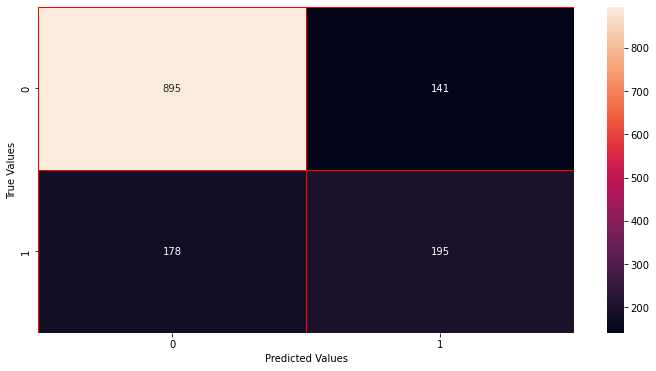

In [39]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [40]:
f, t, _ = metrics.roc_curve(ytest, y_pred_knn)


In [41]:
auc = metrics.roc_auc_score(ytest, y_pred_knn)


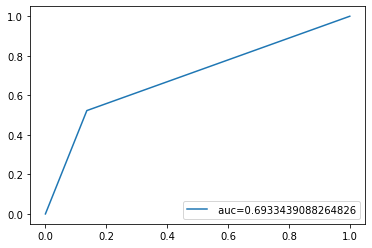

In [42]:
plt.plot(f,t,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision tree

In [43]:
clf1=DecisionTreeClassifier()
clf1

DecisionTreeClassifier()

In [44]:
clf1.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [45]:
y_prediction = clf1.predict(xtest)
y_prediction

array([1, 0, 0, ..., 0, 0, 1])

In [46]:
y_pred = clf1.predict(xtest)
confusion_mtx = confusion_matrix(ytest,y_prediction)
print(classification_report(ytest, y_prediction))
#Visualization Confusion Matrix


              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



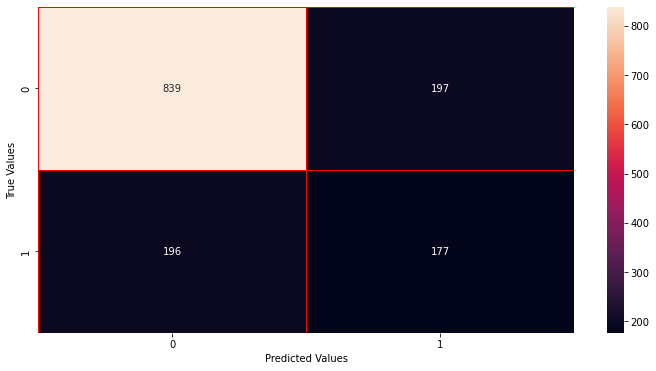

In [47]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [48]:
print("f1_score:",f1_score(ytest,y_prediction, average="micro"))

f1_score: 0.7210787792760823


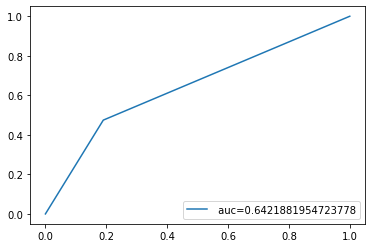

In [49]:
f, t, _ = metrics.roc_curve(ytest,y_prediction)
auc = metrics.roc_auc_score(ytest,y_prediction)
plt.plot(f,t,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()